Real Estate Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.
The price-per-unit in this data is based on a unit measurement of 3.3 square meters.
The regression must have a RMSE less than 7.

In [118]:
!pip install scikit-learn

In [119]:
import pandas as pd

In [120]:
data = pd.read_csv('real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Review the data

In [121]:
data[data.isnull().any(axis=1)]

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit


In [122]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
numeric_features = ['house_age', 'transit_distance', 'latitude', 'longitude']
categorical_features = ['transaction_date', 'local_convenience_stores']
label = data['price_per_unit']

C:\Users\MANDEE~1\AppData\Local\Temp/ipykernel_12676/1038300788.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


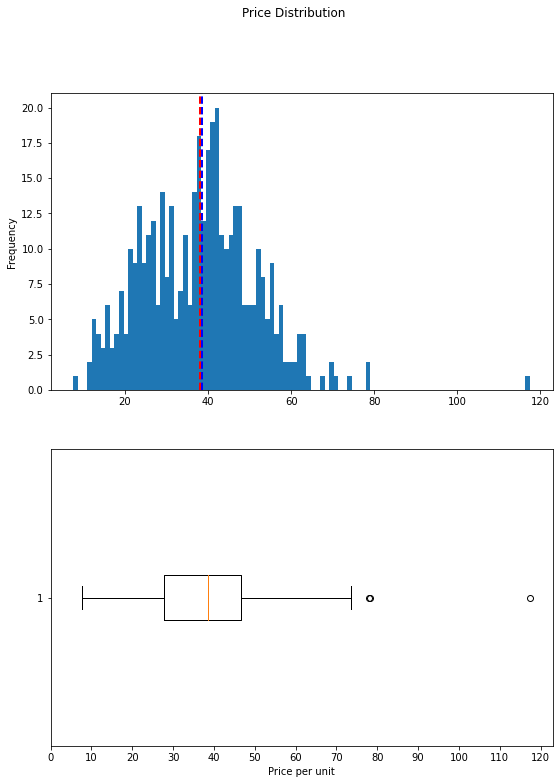

In [125]:
fig, ax = plt.subplots(2, 1, figsize=(9, 12))

ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(label.mean(), color='red', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='blue', linestyle='dashed', linewidth=2)

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Price per unit')
plt.xticks(list(range(0, 130, 10)))

fig.suptitle('Price Distribution')

fig.show()

In [126]:
data = data[data['price_per_unit']<75]
label = data['price_per_unit']

C:\Users\MANDEE~1\AppData\Local\Temp/ipykernel_12676/1038300788.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


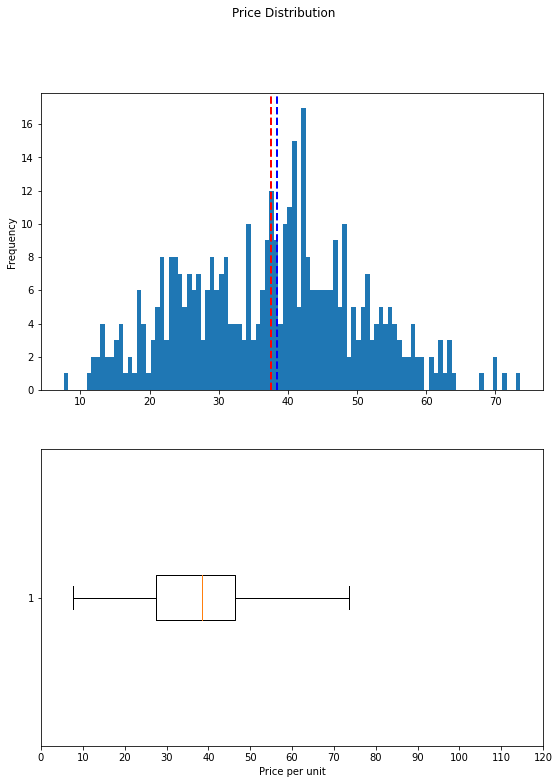

In [127]:
fig, ax = plt.subplots(2, 1, figsize=(9, 12))

ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(label.mean(), color='red', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='blue', linestyle='dashed', linewidth=2)

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Price per unit')
plt.xticks(list(range(0, 130, 10)))

fig.suptitle('Price Distribution')

fig.show()

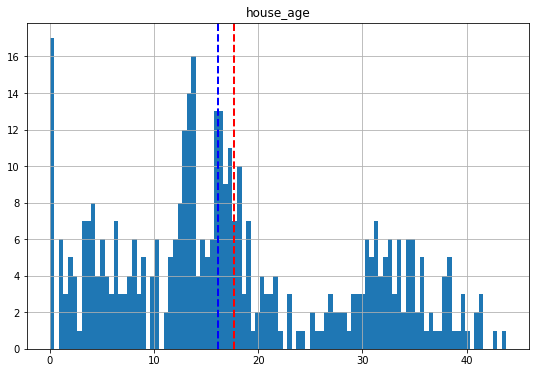

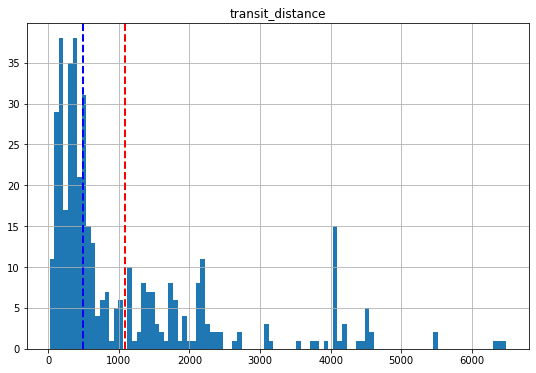

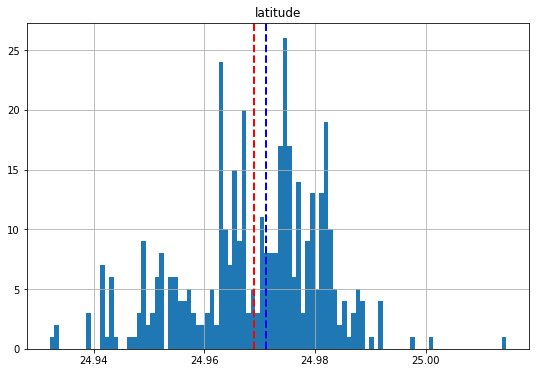

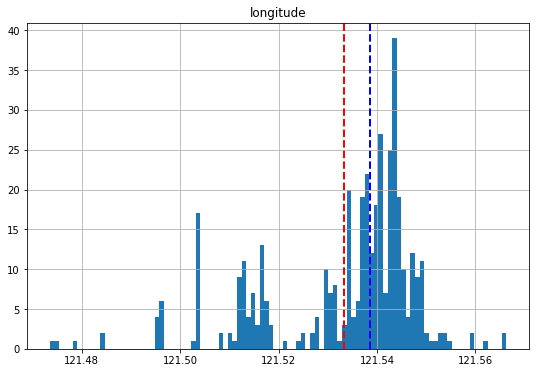

In [128]:
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

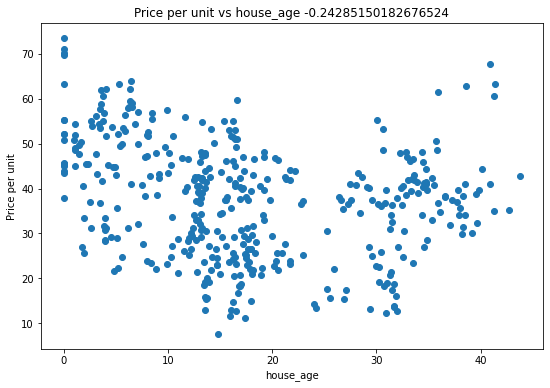

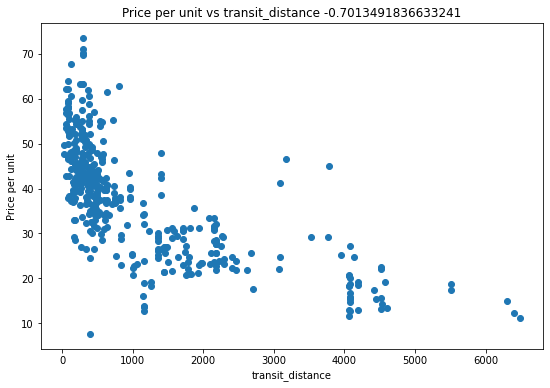

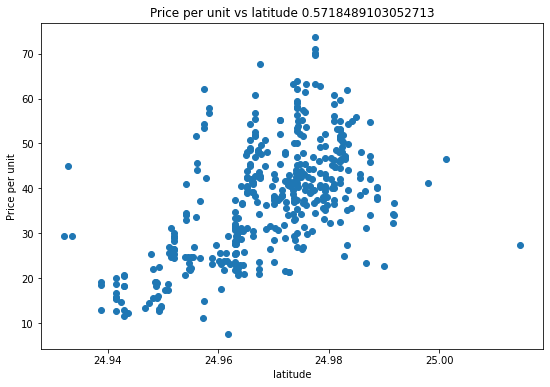

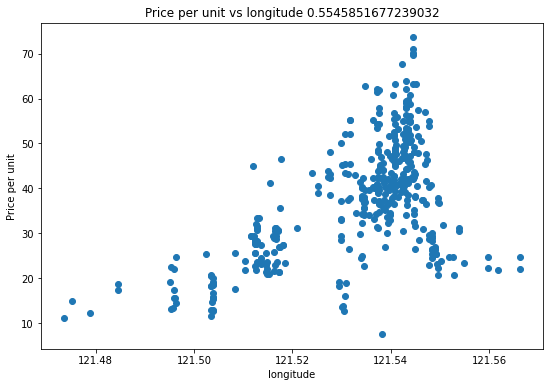

In [129]:
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = data[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price per unit')
    ax.set_title('Price per unit vs ' + col + ' ' + str(correlation))
plt.show()

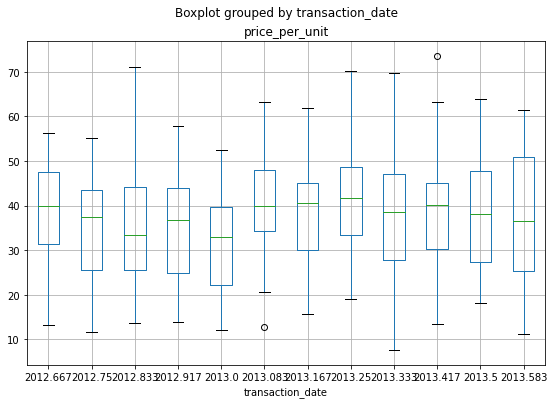

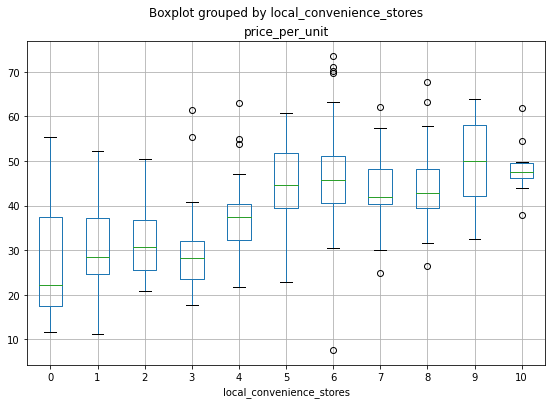

In [130]:
for col in categorical_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by = col, ax = ax)
    ax.set_xlabel(col)
plt.show()

Won't include transaction date as no obvious correlation

Split the data into two subsets

In [131]:
features = [i for i in data.columns[1:-1]]
label = ['price_per_unit']
print(data.columns)
print(features)
print(label)

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')
['house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']
['price_per_unit']


In [132]:
from sklearn.model_selection import train_test_split
X, y = data[data.columns[1:-1]].values, data[data.columns[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 287 rows
Test Set: 124 rows


Train a model using LinearRegression()

In [133]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [134]:
predictions = model.predict(X_test)

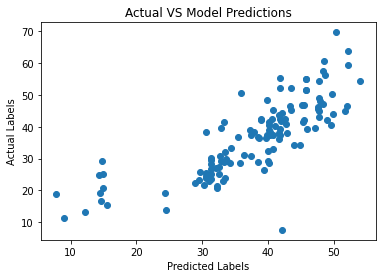

MSE: 53.4141303592471
RMSE: 7.308497134106786
r2: 0.6221831086300258


In [135]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(predicted_values, actual_values):
    plt.scatter(predictions, y_test)
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.title('Actual VS Model Predictions')
    plt.show()
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('r2:', r2)

evaluate(predictions, y_test)

Train a model using Lasso()

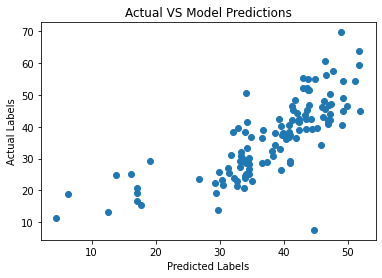

MSE: 59.861863774813344
RMSE: 7.737044899366511
r2: 0.5765760271505123


In [136]:
from sklearn.linear_model import Lasso
model = Lasso().fit(X_train, y_train)
predictions = model.predict(X_test)
evaluate(predictions, y_test)

Train a model using DecisionTreeRegressor()

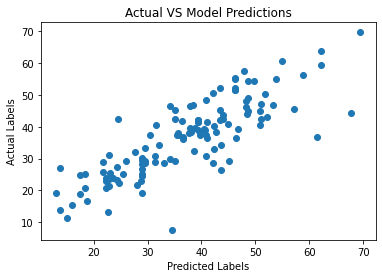

MSE: 50.49786066308245
RMSE: 7.106184676961502
r2: 0.6428109077459323


In [137]:
from sklearn.tree import DecisionTreeRegressor, export_text
model = DecisionTreeRegressor().fit(X_train, y_train)
tree = export_text(model)
predictions = model.predict(X_test)
evaluate(predictions, y_test)

Train a model using RandomForestRegressor

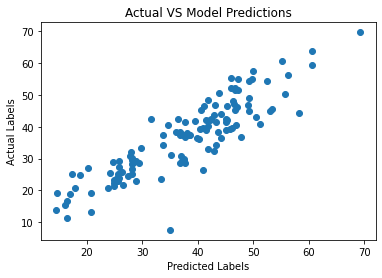

MSE: 31.84114734261057
RMSE: 5.642796057152037
r2: 0.7747763892114782


In [138]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)
evaluate(predictions, y_test)

Train a model using GradientBoostingRegressor

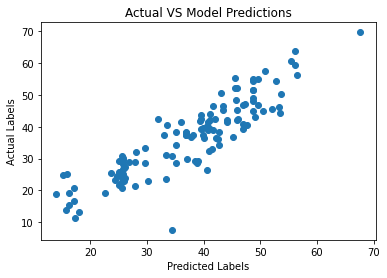

MSE: 29.80601325403003
RMSE: 5.459488369254946
r2: 0.7891716069131822


In [139]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)
evaluate(predictions, y_test)

Train a model using hyperparameters

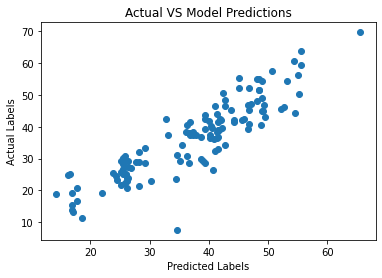

MSE: 30.246013621673274
RMSE: 5.499637590030208
r2: 0.7860593298811209


In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
alg = GradientBoostingRegressor()
params = {'learning_rate':[0.1, 0.5, 1.0], 'n_estimators':[50, 100, 150]}
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_
predictions = model.predict(X_test)
evaluate(predictions, y_test)

Setting the best model

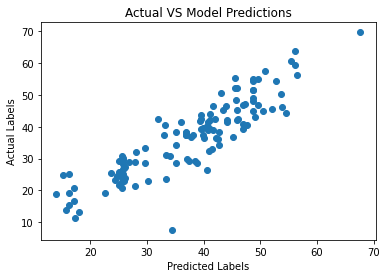

MSE: 29.723087440261747
RMSE: 5.451888428816362
r2: 0.7897581702993413


In [143]:
model = GradientBoostingRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)
evaluate(predictions, y_test)

Using the Trained Model

In [144]:
import joblib
filename = 'Real_Estate_GradientBoostingRegressor_Model'
joblib.dump(model, filename)

['Real_Estate_GradientBoostingRegressor_Model']

In [146]:
loaded_model = joblib.load(filename)

X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction, 2))

Predictions:
48.75
16.31
